In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import struct
%config InlineBackend.figure_format='retina'

In [54]:
# read the data from a given filename
file = open("test data/3A144.TXT", "rb") 
data = file.read()

# stores the actual data. In this case, it is the axes from the MPU 
# and then the PWM values sent to the servos
axes =[[] for i in range(6)]

# which list to put the data in
counter = 0

# address of the byte being read
location = 0

# how many times it has gone wrong
errors = 0

while True:
    try: 
        # try to read the next 4 bytes as a float
        temp = struct.unpack('f', data[location:location+4])[0]
        if abs(temp) > 5000:
            # if the number is probably wrong, throw and error
            temp = 0
            1/0
        axes[counter].append(temp)
    except:
        # keep a track of how many errors work
        errors += 1
        
    
    # keep track of which list in axes to use
    counter += 1
    if counter == len(axes):
        # if the counter is past the final list, reset the counter
        # and skip 6 bytes, which represent the newline character
        counter = 0
        location += 6
    
    # increment the location 1 float and 1 comma along
    location += 5
    
    if location >= len(data):
        # exit the loop at the end of the data
        break
# report how many errors there were
errors

345

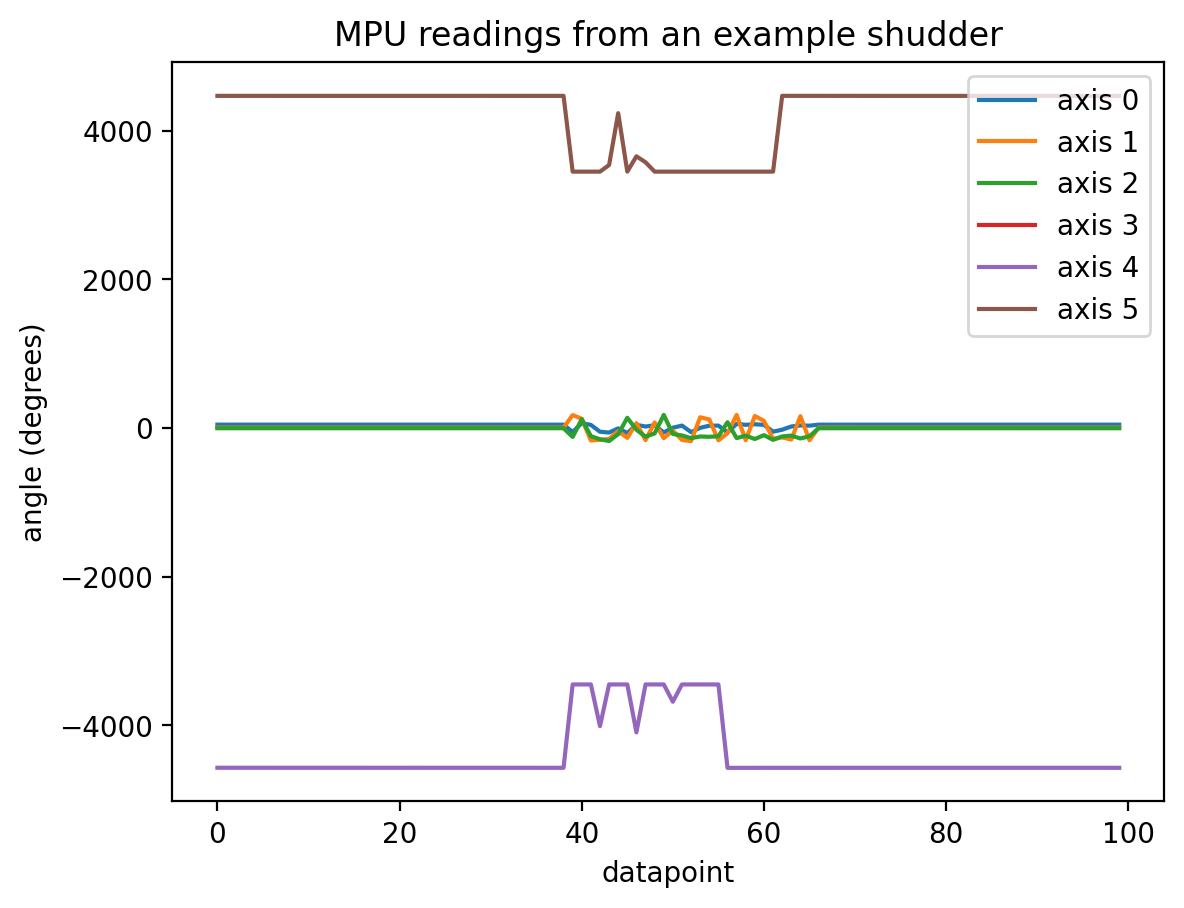

In [57]:
for i in range(len(axes)):
    plt.plot(axes[i][:], label = f"axis {i}")
plt.legend()
plt.xlabel("line")
plt.ylabel("value")

In [7]:
for i in range(3):
    print(axes[i][11])

12.868634223937988
9.14888858795166
-8.698468208312988


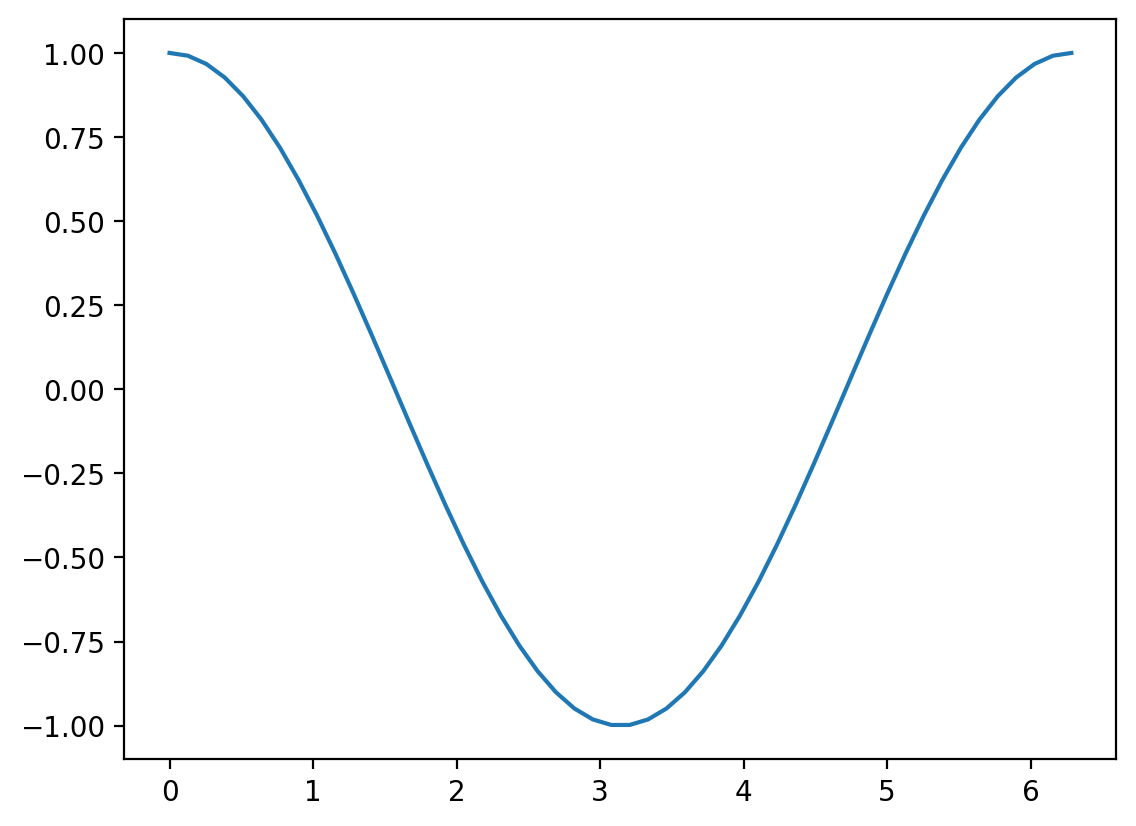

In [8]:
x = np.linspace(0, 2*np.pi)
y = np.cos(x)
plt.plot(x, y)